<a href="https://colab.research.google.com/github/dadevansh/ML-projects/blob/master/Linear_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import california_housing
from sklearn.metrics import mean_squared_error
from scipy import stats
import seaborn as sns;
import random

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.california_housing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
housing_data = california_housing.fetch_california_housing()

In [ ]:
Features = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
Target = pd.DataFrame(housing_data.target, columns=['Target'])
df = Features.join(Target)

In [ ]:
df = df[df.Target < 5]

In [ ]:
X = df.MedInc
y = df.Target

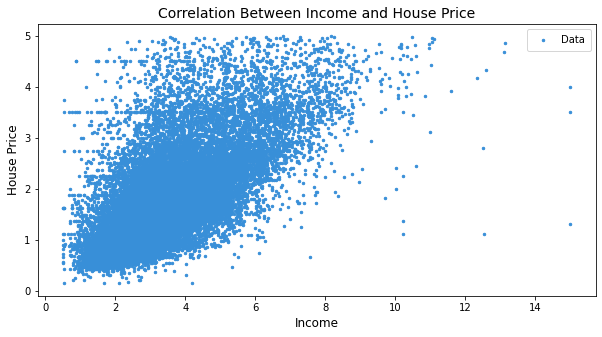

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.title('Correlation Between Income and House Price', fontSize=14)
plt.xlabel('Income', fontSize=12)
plt.ylabel('House Price', fontSize=12)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.show()

In [ ]:

def SGD(X,y,lr = 0.01,epochs=100,batch_size = 1):
  m,b = 0.1,0.1
  mse = []
  for i in range(epochs):
    list_indx = np.arange(0,len(X))
    indx = random.choice(list_indx)
    X = np.array(X)
    y = np.array(y)
    Xs = X[indx]
    ys = y[indx]
    N = batch_size
    f = ys - (m*Xs + b)
    # Updating parameters m and b
    m -= lr * (-2 * np.sum(np.dot(Xs,f)) / N)
    b -= lr * (-2 * np.sum(f) / N)
    mse.append(mean_squared_error(y, m*X+b))        
    
  return m, b, mse


In [ ]:
m, b, mse = SGD(X, y ,lr=0.01, epochs=100, batch_size=2)

MSE: 0.5566916950951109


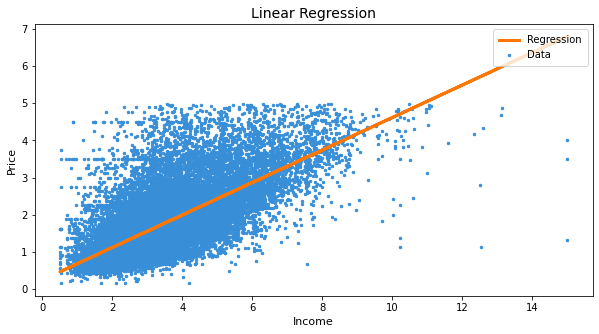

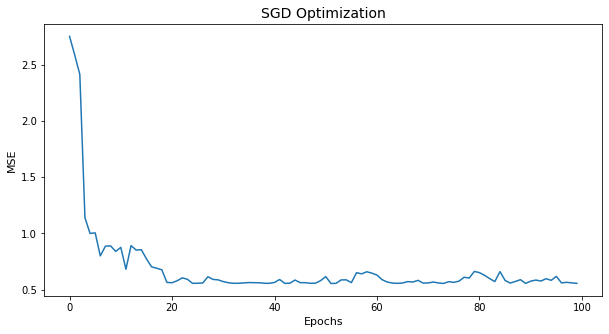

In [ ]:
y_pred = m*X + b

print("MSE:",mean_squared_error(y, y_pred))
plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.plot(X, y_pred, c='#ff7702', lw=3, label='Regression')
plt.title('Linear Regression', fontSize=14)
plt.xlabel('Income', fontSize=11)
plt.ylabel('Price', fontSize=11)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.show()


plt.figure(figsize=(10,5))
plt.plot(range(len(mse)), mse)
plt.title('SGD Optimization', fontSize=14)
plt.xlabel('Epochs', fontSize=11)
plt.ylabel('MSE', fontSize=11)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy import linalg as LA

In [ ]:
data = [[np.random.rand(), np.random.rand()] for i in range(10)]
for i, point in enumerate(data):
  x, y = point
  if 0.5*x - y + 0.25 > 0:
    data[i].append(-1)
  else:
    data[i].append(1)

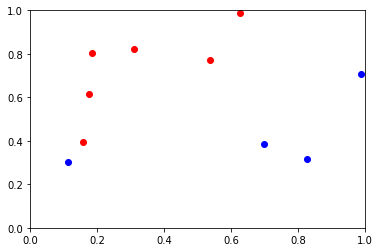

In [ ]:
for x, y, l in data:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  plt.scatter(x, y, c=clr)
  plt.xlim(0,1)
  plt.ylim(0,1)

In [ ]:
def svm_function(x, y, epoch, l_rate):
    
    Ones=np.ones((len(x),1))
    x=np.append(x,Ones,axis=1)
    w = np.zeros(len(x[0]))
    for e in range(0,epoch):
      i = random.choice(range(0,len(x)))
      result = y[i]*np.dot(x[i], w)
      if result < 1:
        w = (1-(1/(e+1))) * w + (y[i] * x[i])/(l_rate*(e+1))
      else:
        w = (1-(1/(e+1)))*w
      normt = 1/((np.sqrt(l_rate))*LA.norm(w))
      if normt<1:
        w = w*normt;
   
    return w

In [ ]:
data = np.asarray(data)
X=data[:,:2]
Y= data[:,2]
w =svm_function(X,Y,10000,0.01)

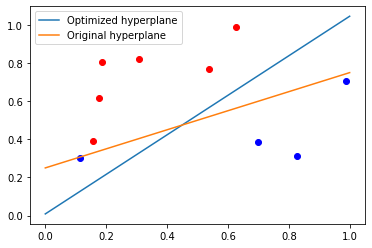

In [ ]:
a =-w[0]/w[1]
b = -w[2]/w[1]
xx = np.linspace(0, 1)
yy =  a * xx + b

a1 = 0.5
b1=0.25
yy1 =   a1 * xx + b1

fig = plt.figure()
ax = plt.subplot(111)
for x, y, l in data:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  ax.scatter(x, y, c=clr)
ax.plot(xx,yy,label='Optimized hyperplane')
ax.plot(xx,yy1,label='Original hyperplane')
ax.legend()